## Predicting House prices from other features
- using the scikitlearn linear regression model

## Part-1: Importing the Libraries

In [7]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part-2: Uploading the dataset

In [8]:
## Uploading the dataset
df=pd.read_excel('Housing.xlsx')

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Part-3: Visualizing the dataset

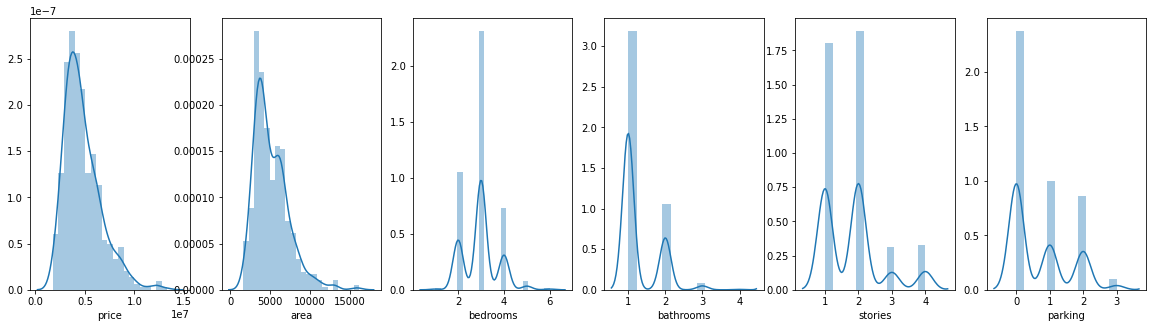

In [13]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(20,5))

sns.distplot(df['price'], ax=ax1)
sns.distplot(df['area'], ax=ax2)
sns.distplot(df['bedrooms'], ax=ax3)
sns.distplot(df['bathrooms'], ax=ax4)
sns.distplot(df['stories'], ax=ax5)
sns.distplot(df['parking'], ax=ax6)
plt.show()

In [14]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


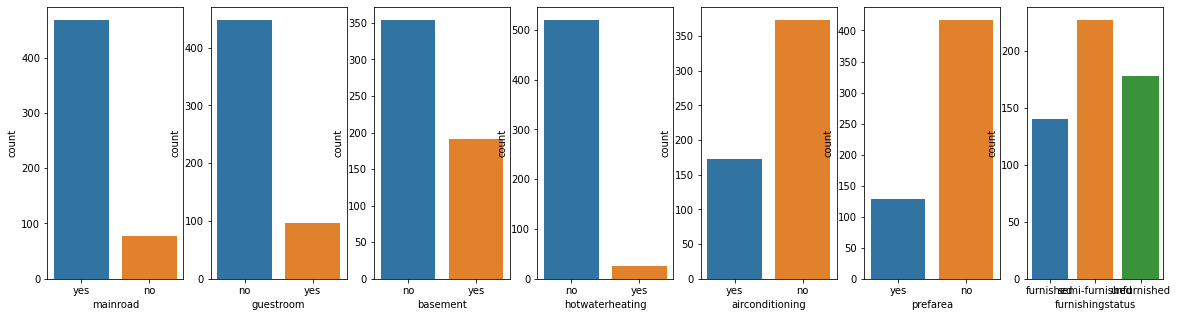

In [15]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(20,5))

sns.countplot(df['mainroad'], ax=ax1)
sns.countplot(df['guestroom'], ax=ax2)
sns.countplot(df['basement'], ax=ax3)
sns.countplot(df['hotwaterheating'], ax=ax4)
sns.countplot(df['airconditioning'], ax=ax5)
sns.countplot(df['prefarea'], ax=ax6)
sns.countplot(df['furnishingstatus'], ax=ax7)
plt.show()

### Inference from the dataset
- median price is 4.34, but it has a skew towards higher priced houses due to which the mean price turns out to be higher than median at 4.76
- median area is 4600, but has a few bigger houses, due to which the mean area is higher at 5150
- features like bathrooms, mainroad, guestroom and hotwaterheating show low variance and are candidates of dropping from the model that will be built

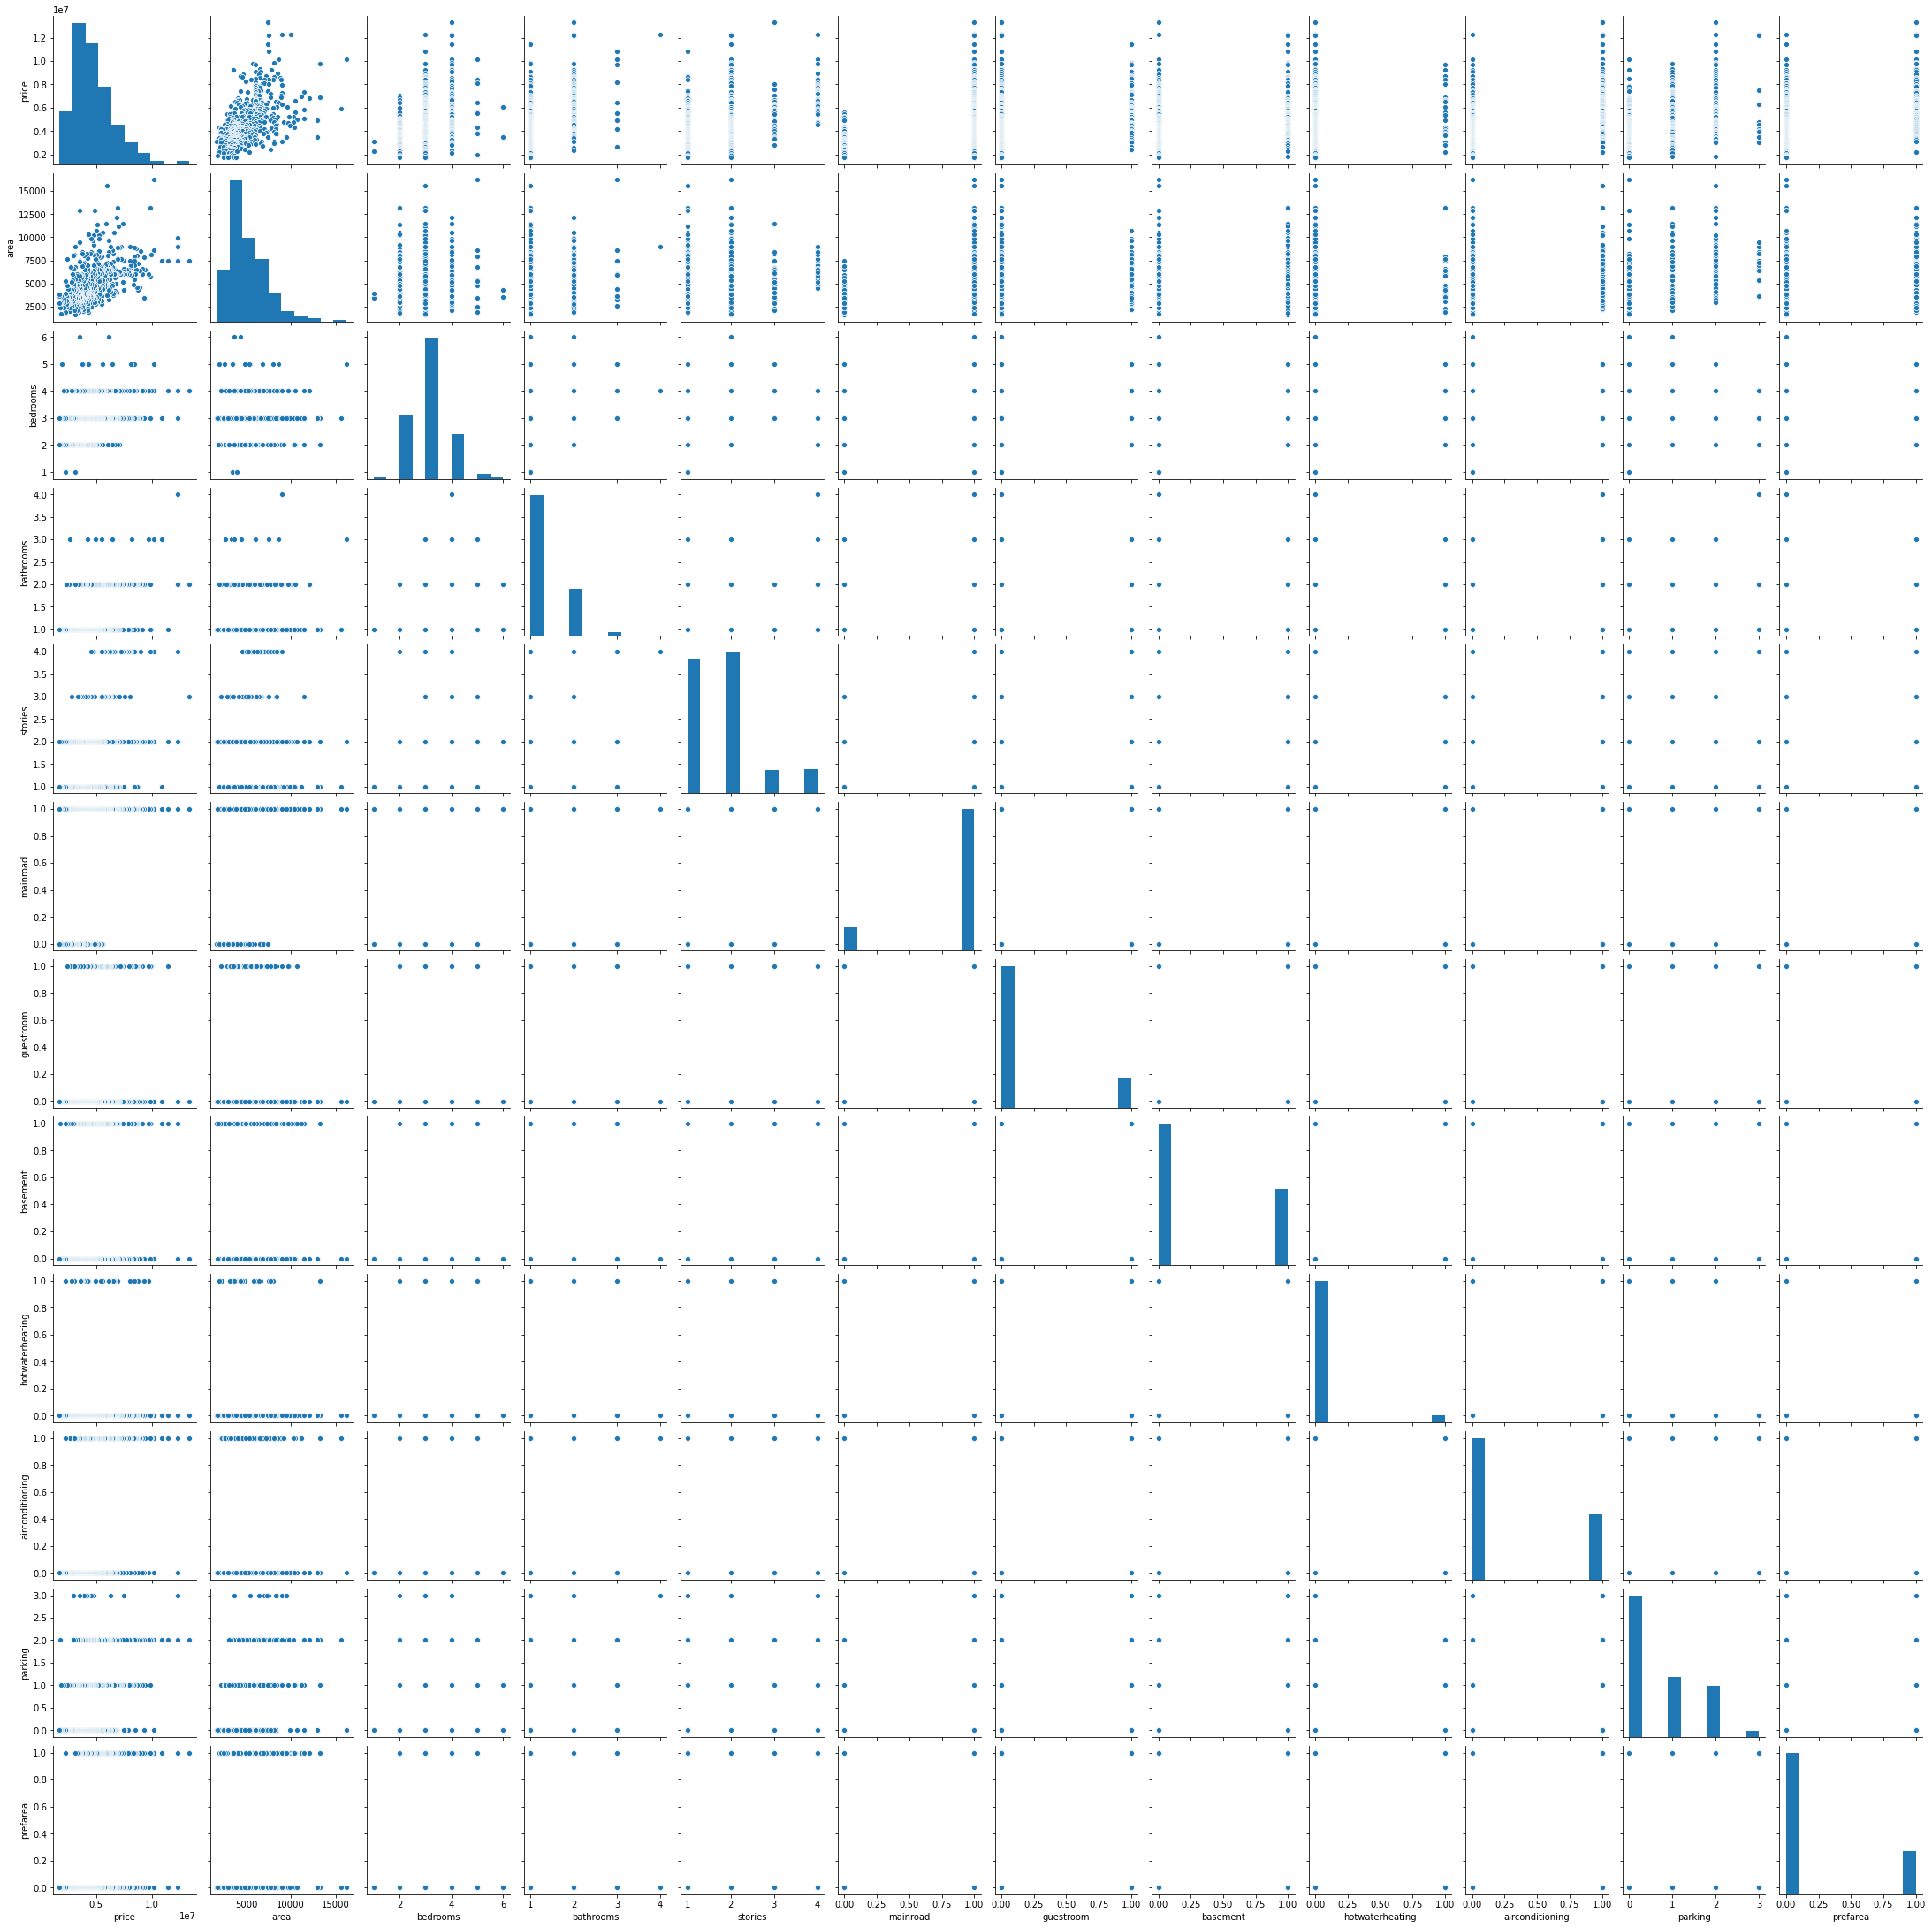

In [27]:
# pairplots for all numerical features and their correlation with price
sns.pairplot(df)
plt.show()

### Inference from pairplots
- price seem to have a high correlation with area, doesnt seem to have high correlation with other features
- the independent features doesnt seem to have any significant correlation with each other

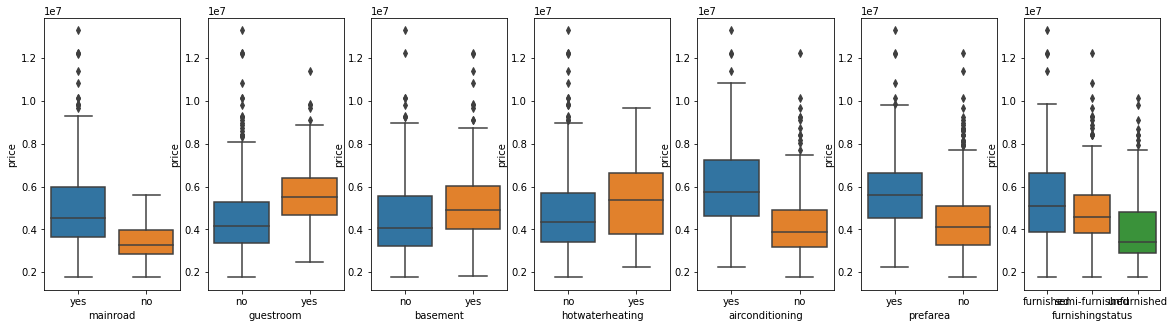

In [17]:
# boxplots for all categorical features and their relation with price
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(20,5))

sns.boxplot(x='mainroad', y='price', data=df, ax=ax1)
sns.boxplot(x='guestroom', y='price', data=df, ax=ax2)
sns.boxplot(x='basement', y='price', data=df, ax=ax3)
sns.boxplot(x='hotwaterheating', y='price', data=df, ax=ax4)
sns.boxplot(x='airconditioning', y='price', data=df, ax=ax5)
sns.boxplot(x='prefarea', y='price', data=df, ax=ax6)
sns.boxplot(x='furnishingstatus', y='price', data=df, ax=ax7)
plt.show()

### Inference from boxplots
- mainroad, guestroom, airconditioning, prefarea, furnishingstatus seem to have a higher relation with price
- basement, hotwaterheating doesnt seem to have a prominent relation with price

## Part-4: Data Preparation

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
# converting 'yes', 'no' values to binary 1 and 0 for relevant columns

# list of features to map
col=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes':1, 'no':0})

# applying the map function to the data
df[col]=df[col].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [20]:
# one hot coding for furnishingstatus

# Get the dummy variables for the feature 'furnishingstatus' (3 categories) and store it in a new variable - 'status'
# send the categorical column to the get.dummies()
status=pd.get_dummies(df['furnishingstatus'])

status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [21]:
# we can drop one of the columns, to limit the number of features
# dropping the 1st column
status=pd.get_dummies(df['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [22]:
# add status to df with concat function
df1=pd.concat([df, status], axis=1)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [23]:
# we can now drop the original furnishingstatus column
df1.drop('furnishingstatus', axis=1, inplace=True)
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [25]:
# Let us check if any of the columns have any other values other than numeric
# we use np.isreal function for this

df1[~df1.applymap(np.isreal).all(1)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished


In [31]:
df1.dtypes

price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
mainroad           int64
guestroom          int64
basement           int64
hotwaterheating    int64
airconditioning    int64
parking            int64
prefarea           int64
semi-furnished     uint8
unfurnished        uint8
dtype: object

### we now have converted all features into numerical values

## Part-5: Rescaling all the independent features

In [32]:
# we will need to rescale all variables so that they can be compared at same scale

from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()   # initializing an object

In [34]:
# apply scaler to all the variables
num_features=['area','bedrooms','bathrooms','stories','parking']
df1[num_features]=scaler.fit_transform(df1[num_features])

In [35]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


## Part-6: Splitting data into Target and Independent variables

In [39]:
X=df1.drop('price', axis=1)
Y=df1['price']

## Part-7: Splitting data into Training and Test data

In [42]:
# Split data into training and test part
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=0)

In [43]:
train_x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
498,0.024055,0.2,0.000000,0.333333,1,0,0,0,0,0.000000,0,1,0
531,0.250859,0.4,0.000000,0.000000,0,0,0,0,1,0.000000,1,0,1
532,0.092784,0.2,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,1
278,0.120275,0.4,0.000000,0.333333,1,0,1,0,0,0.666667,1,1,0
101,0.264605,0.4,0.000000,0.666667,1,0,0,0,0,0.333333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1,1,0
277,0.598625,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
9,0.281787,0.4,0.333333,1.000000,1,1,0,0,1,0.333333,1,0,1
359,0.134021,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,0,0,1


In [45]:
test_x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
239,0.161512,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,0,0
113,0.547766,0.4,0.000000,0.000000,1,0,1,0,0,0.666667,1,0,0
325,0.124399,0.6,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0
66,0.793814,0.2,0.000000,0.000000,1,0,1,1,0,0.333333,0,0,0
479,0.138144,0.6,0.000000,0.333333,0,0,0,0,0,0.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.092784,0.6,0.000000,0.666667,1,0,1,0,1,0.666667,0,1,0
525,0.136770,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1
245,0.254983,0.4,0.000000,0.333333,1,0,0,0,0,0.666667,1,0,1
7,1.000000,0.8,0.666667,0.333333,1,0,0,0,0,0.000000,0,0,1


### we have split the data into training set with 408 rows and test set with 137 rows

## Part-8: Checking for multi collinearity among independent features

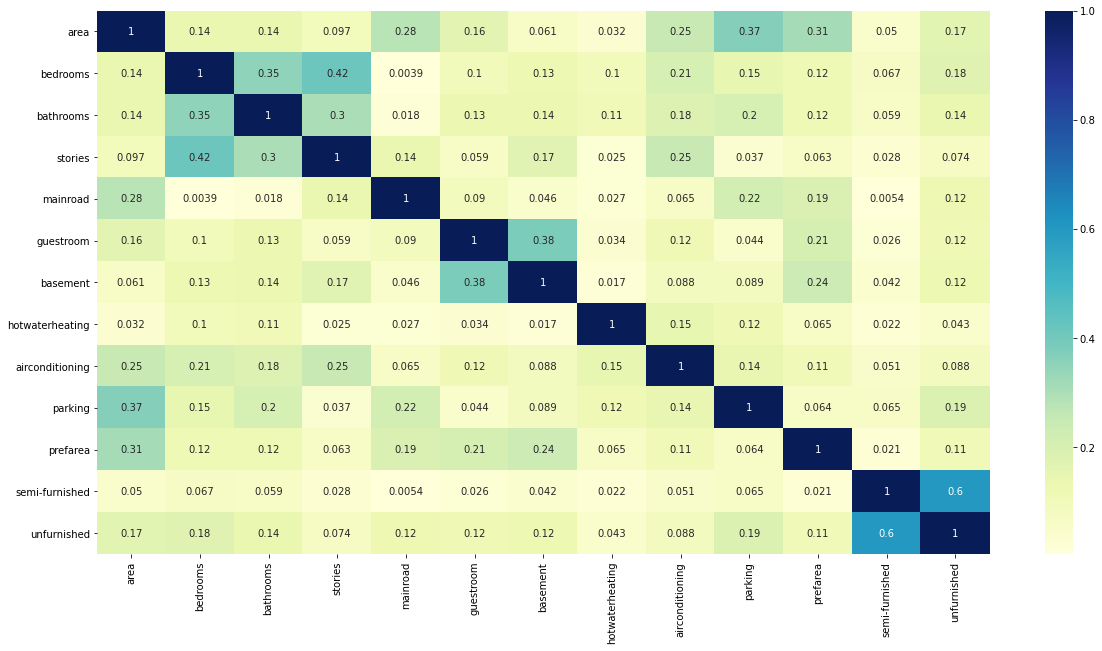

In [50]:
# checking for collinearity map to understand which variables are correlated
plt.figure(figsize=(20,10))
sns.heatmap(train_x.corr().abs(), annot=True, cmap='YlGnBu')
plt.show()

### Inference from collinearity mapping
- none of the features have collinearity of greater than 0.5
- hence, we need not drop any features in the first cut model
- parking and area, stories and bedrooms, bathrooms and bedrooms, basement and guestroom, unfurnished and semi-furnished have some minor collinearity

## Part-9: Building a Linear Model
- using scikit learn, linear regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model1=LinearRegression()  # initializing an object

In [53]:
model1.fit(train_x,train_y)

LinearRegression()

In [57]:
print("Intercept of model1: ", model1.intercept_)

Intercept of model1:  1918407.719738285


In [58]:
print("Co-efficients of model1: ", model1.coef_)

Co-efficients of model1:  [3586576.706592    617991.16029424 2924605.0459631  1330349.3995715
  509526.40810341  468590.01213115  333429.68416784 1215780.87978795
  883342.18241469  689750.37696018  654531.63249401  -47339.06527315
 -449195.87386977]


## Part-10: Testing the model

In [62]:
y_predict=model1.predict(test_x)
y_predict

array([ 3927772.45977175,  6087531.42807498,  4524346.95331464,
        7177736.07089375,  2778921.57765823,  7047381.2861442 ,
        3228068.56077114,  3242726.92540358,  3445768.1292417 ,
        8258898.20139178,  6610368.39100725,  3687995.66276003,
        3848371.22183603,  4564215.8055141 ,  4029799.21931293,
        1908678.40147362,  4082198.15984992,  3704997.03925029,
        3252569.77268058,  4597233.46123626,  6006930.33403464,
        6401804.20583035,  4780358.90188477,  2681709.52381136,
        5276601.19394648,  5705110.99526476,  5394362.05549798,
        5646485.78609423,  5761132.90155103,  5722239.65051661,
        3411985.4094992 ,  6422408.39440443,  7132987.40551253,
        2921388.55867763,  4473280.65481436,  5258021.41582876,
        5060378.33762844,  3746320.17327733,  2871634.33896648,
        3974632.55013512,  8012049.91068716,  4869296.66553357,
        6437470.13549009,  3507157.35324346,  3801255.15455894,
        6445177.16768785,  4530011.89120

In [63]:
from sklearn.metrics import mean_squared_error
print("\n Mean squared error =:", mean_squared_error(y_predict,test_y))


 Mean squared error =: 939375166376.0216


In [64]:
from sklearn.metrics import r2_score
print("\n R2 or Coefficient of Determination =:", r2_score(y_predict,test_y))


 R2 or Coefficient of Determination =: 0.6395372749040434


## Checking VIF scores for all the features

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


# the below table shows the colinearity of each feature with all other features

,Features,VIF
1,bedrooms,8.09
4,mainroad,6.26
0,area,5.35
3,stories,2.77
11,semi-furnished,2.31
9,parking,2.15
6,basement,2.03
12,unfurnished,1.91
8,airconditioning,1.82
2,bathrooms,1.68


## Residual Analysis with Error Terms

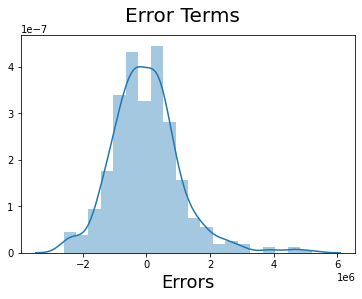

In [68]:
# Residual Analysis

# Prediction on the training data
# Recall the error residuals are calculated on training data
# here also we just use model.predict(Dataframe)
y_train_price=model1.predict(train_x)

# residual analysis is done on the training data

# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((train_y - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()